In [55]:
import os
import sklearn
os.environ['PROJ_LIB'] = 'C:\\Users\\Danie\\Anaconda3\\pkgs\\proj4-5.2.0-ha925a31_1\\Library\\share'
from mpl_toolkits.basemap import Basemap, cm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
sns.set(style="white")


sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

data = pd.read_csv(BristolAirbnbListings.csv')

#Hiding warning messages for improved presentation
import warnings
warnings.filterwarnings('ignore')

# Data Exploration 

In [56]:
#taking a look at the data
data.head()

id                                               name  host_id  \
0   70820                   City View - Sarah's double room.   360195   
1  117122                    City Centre - Waterside Retreat   591555   
2  146407                 Sunny Central Artist Cottage (Dbl)   708175   
3  176306  The White Room -  Central Bristol Art House Ga...   708175   
4  220956                Light, Modern, 1st Floor Apartment.  1145941   

  host_name  neighbourhood postcode   latitude  longitude property_type  \
0     Sarah  Windmill Hill    BS3 4  51.439942  -2.591726     Townhouse   
1    Marcus        Clifton  BS8 4UJ  51.450512  -2.610536     Apartment   
2      Orla     Southville      BS3  51.441308  -2.602706     Townhouse   
3      Orla     Bedminster      NaN  51.441006  -2.601208     Townhouse   
4   Stephen     Bedminster  England  51.438517  -2.601421     Apartment   

         room_type  ... reviews_per_month review_scores_rating  \
0     Private room  ...              2.10                   96   
1     Private room  ...              1.40                   99   
2     Private room  ...              0.76                   91   
3     Private room  ...              0.41                   95   
4  Entire home/apt  ...              0.85                   94   

  review_scores_accuracy review_scores_cleanliness  review_scores_checkin  \
0                     10                         9                     10   
1                     10                        10                     10   
2                      9                         8                      9   
3                      9                         9                     10   
4                     10                         9                     10   

   review_scores_communication  review_scores_location review_scores_value  \
0                         10.0                    10.0                10.0   
1                         10.0                    10.0                10.0   
2                         10.0                     9.0                 9.0   
3                         10.0                     9.0                 9.0   
4                         10.0                     9.0                 9.0   

   calculated_host_listings_count availability_365  
0                               5               44  
1                               1              360  
2                               2               46  
3                               2               57  
4                               1              253  

[5 rows x 28 columns]

In [57]:
data.describe()

id       host_id     latitude    longitude        price  \
count  2.375000e+03  2.375000e+03  2375.000000  2375.000000  2375.000000   
mean   1.916208e+07  7.069285e+07    51.461004    -2.590871    76.600842   
std    7.605464e+06  6.414426e+07     0.016149     0.025749   129.165841   
min    7.082000e+04  5.253600e+04    51.404299    -2.701418     0.000000   
25%    1.400028e+07  1.929395e+07    51.452411    -2.607064    35.000000   
50%    2.043719e+07  4.763294e+07    51.460520    -2.592629    59.000000   
75%    2.563622e+07  1.156455e+08    51.469853    -2.578521    85.000000   
max    3.009993e+07  2.261455e+08    51.512555    -2.514635  5000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count     2375.000000        2375.000000        2069.000000   
mean         2.825263          31.608842           2.193823   
std         13.122816          51.215247           2.197518   
min          1.000000           0.000000           0.020000   
25%          1.000000           2.000000           0.570000   
50%          2.000000          11.000000           1.450000   
75%          2.000000          38.000000           3.100000   
max        365.000000         477.000000          18.030000   

       review_scores_communication  review_scores_location  \
count                  2037.000000             2035.000000   
mean                      9.832597                9.555283   
std                       0.577031                0.670538   
min                       0.000000                0.000000   
25%                      10.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value  calculated_host_listings_count  availability_365  
count          2035.000000                     2375.000000       2375.000000  
mean              9.474693                        6.943579        121.521263  
std               0.802358                       16.766377        128.369568  
min               0.000000                        1.000000          0.000000  
25%               9.000000                        1.000000          0.000000  
50%              10.000000                        1.000000         71.000000  
75%              10.000000                        3.000000        225.500000  
max              10.000000                       78.000000        365.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EAC3F229B0>,
      dtype=object)

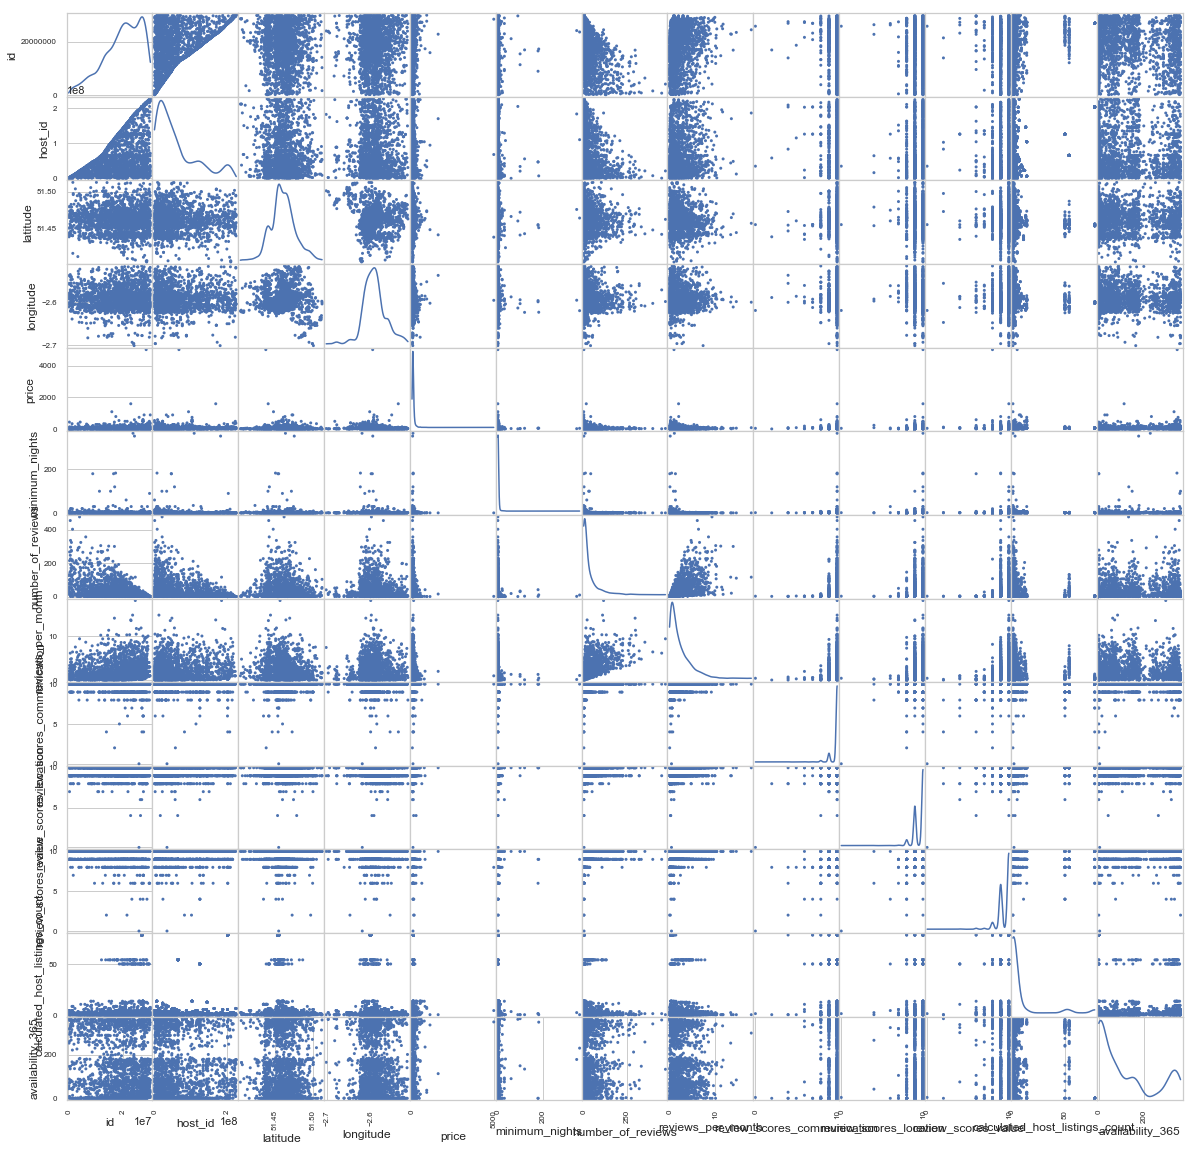

In [58]:
scatter_matrix(data, alpha = 1.0, figsize = (20, 20), diagonal = 'kde')

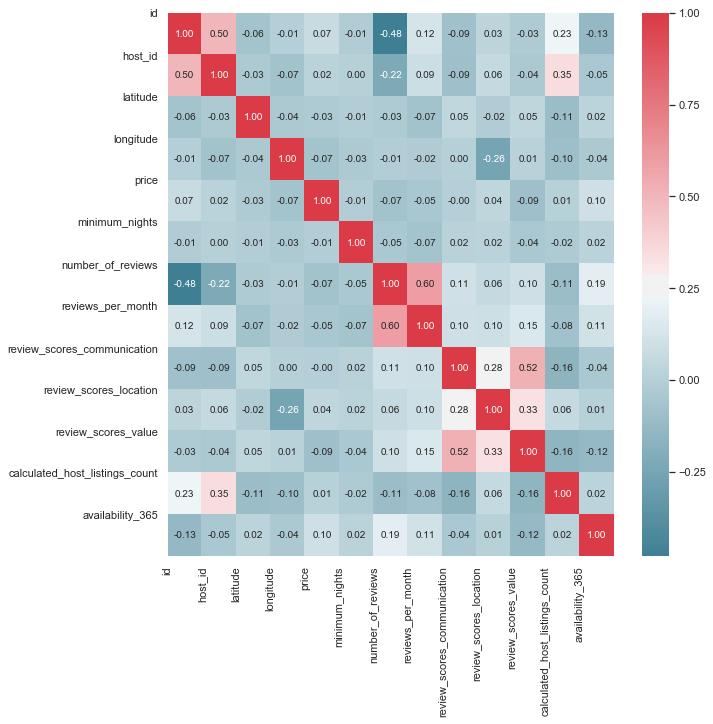

In [59]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

There is no obvious relationships so the data will be further explored. The purpose of this analysis will be to use tools and techniques to transform variables so that the price variable can be predicted. To begin with all variables will be kept and the data will be cleansed.

# Data Cleansing

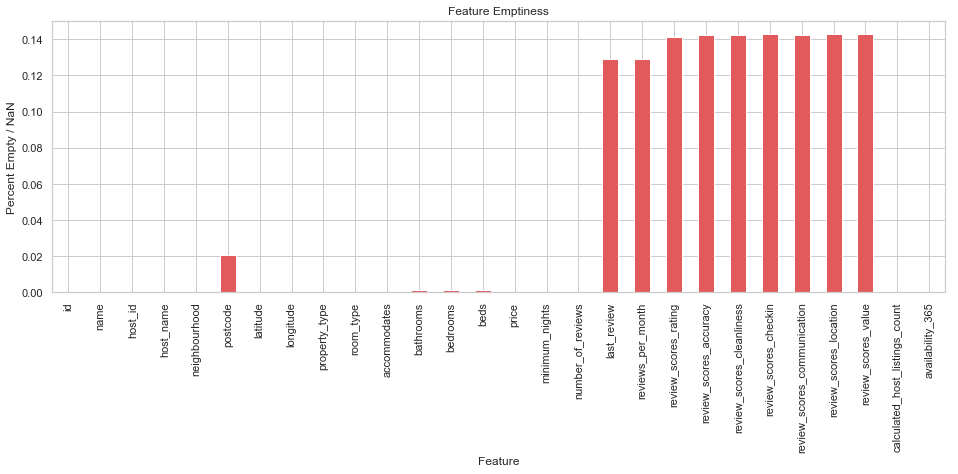

In [60]:
percentage_missing_data = data.isnull().sum() / data.shape[0]
ax = percentage_missing_data.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
plt.show()

There is two options available to deal with this missing data; drop the rows containing the data or drop the columns. As the objective is to predict price, the number of records will be saved. Therefore, the columns will be dropped. The number_of_reviews will be kept for now to have a variable representing reviews.

In [64]:
data=data.drop(['last_review', 'reviews_per_month', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location','review_scores_value'], axis=1)

KeyError: "['last_review' 'reviews_per_month' 'review_scores_rating'\n 'review_scores_accuracy' 'review_scores_cleanliness'\n 'review_scores_checkin' 'review_scores_communication'\n 'review_scores_location' 'review_scores_value'] not found in axis"

In [65]:
data.head()

id                                               name  host_id  \
0   70820                   City View - Sarah's double room.   360195   
1  117122                    City Centre - Waterside Retreat   591555   
2  146407                 Sunny Central Artist Cottage (Dbl)   708175   
3  176306  The White Room -  Central Bristol Art House Ga...   708175   
4  220956                Light, Modern, 1st Floor Apartment.  1145941   

  host_name  neighbourhood postcode   latitude  longitude property_type  \
0     Sarah  Windmill Hill    BS3 4  51.439942  -2.591726     Townhouse   
1    Marcus        Clifton  BS8 4UJ  51.450512  -2.610536     Apartment   
2      Orla     Southville      BS3  51.441308  -2.602706     Townhouse   
3      Orla     Bedminster      NaN  51.441006  -2.601208     Townhouse   
4   Stephen     Bedminster  England  51.438517  -2.601421     Apartment   

         room_type accommodates bathrooms bedrooms beds  price  \
0     Private room            2         1        1    1     27   
1     Private room            4         2        1    2     65   
2     Private room            3         1        1    2     38   
3     Private room            2         1        1    1     35   
4  Entire home/apt            2         1        1    1     59   

   minimum_nights  number_of_reviews  calculated_host_listings_count  \
0               4                130                               5   
1               1                126                               1   
2               2                 57                               2   
3               2                 30                               2   
4               1                 74                               1   

   availability_365  
0                44  
1               360  
2                46  
3                57  
4               253

The inital plan was to attempt to save the data record with null values in the review columns by averaging the other review columns that were out of 10. However, further exploration has shown that the this is not possible as the null values are present across all five review variables for some records. Therefore, data with null values will be dropped. This is not ideal because it is such a high percentage of the dataset but it leaves over 80% of the original data so the impact on the overall relationships should not be affected. It may be the case that further analysis will show that these variables are not relevant and the columns can be dropped, increasing our data for other variables. However, reviews should be important especially for AirBnB as the nature of the business is based on trust so these rows will be dropped for now. 

In [66]:
data=data.dropna()

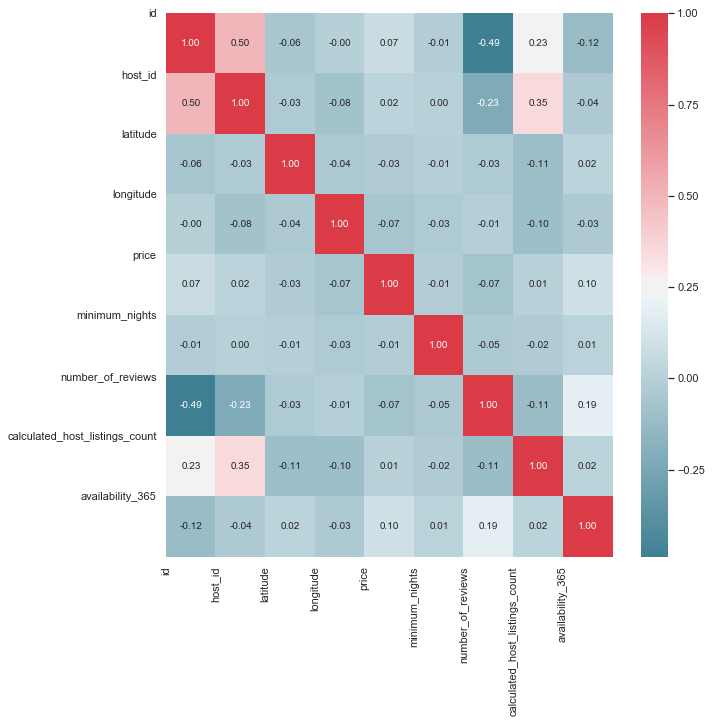

In [67]:
corr = data.corr()

fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns);

plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

Now columns containing unique values will be explored.

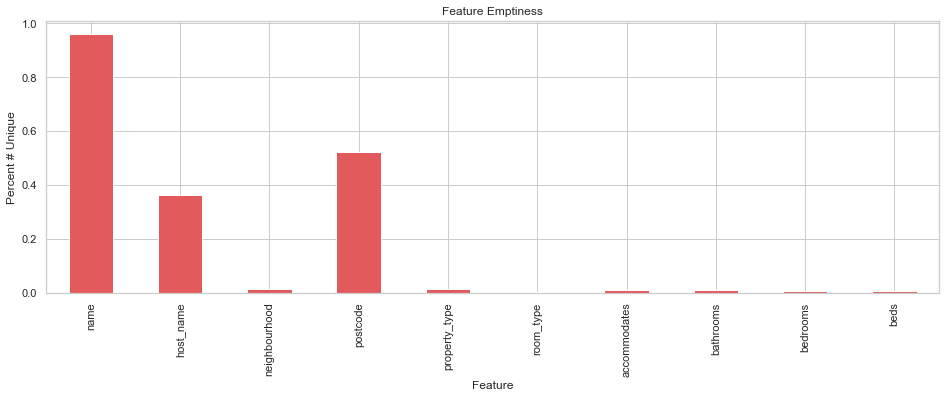

In [68]:
categories = data.columns[data.dtypes == 'object']
percentage_unique = data[categories].nunique() / data.shape[0]

ax = percentage_unique.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent # Unique')
ax.set_title('Feature Emptiness')
plt.show()

The variables postcode and last_review will be removed for now, the former because there are other variables relating to location and the latter based on judgement as most a quick glance seen most of them were in the same year anyway. The variable host_name will also be dropped because it should be irrlevant for this analysis. However, the name variable will be kept as it may be able to be eoncoded for future analysis

In [288]:
data = data.drop(['postcode', 'last_review','host_name'], axis=1)
data.head()

id                                               name  host_id  \
0   70820                   City View - Sarah's double room.   360195   
1  117122                    City Centre - Waterside Retreat   591555   
2  146407                 Sunny Central Artist Cottage (Dbl)   708175   
4  220956                Light, Modern, 1st Floor Apartment.  1145941   
5  307634  Peaceful Safe Home & Clear Space 'The Lilac Room'  1582810   

   neighbourhood   latitude  longitude property_type        room_type  \
0  Windmill Hill  51.439942  -2.591726     Townhouse     Private room   
1        Clifton  51.450512  -2.610536     Apartment     Private room   
2     Southville  51.441308  -2.602706     Townhouse     Private room   
4     Bedminster  51.438517  -2.601421     Apartment  Entire home/apt   
5         Easton  51.466409  -2.555332     Townhouse     Private room   

  accommodates bathrooms  ... reviews_per_month review_scores_rating  \
0            2         1  ...              2.10                   96   
1            4         2  ...              1.40                   99   
2            3         1  ...              0.76                   91   
4            2         1  ...              0.85                   94   
5            2         1  ...              0.79                   93   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                      10                          9                     10   
1                      10                         10                     10   
2                       9                          8                      9   
4                      10                          9                     10   
5                      10                         10                     10   

   review_scores_communication review_scores_location review_scores_value  \
0                         10.0                   10.0                10.0   
1                         10.0                   10.0                10.0   
2                         10.0                    9.0                 9.0   
4                         10.0                    9.0                 9.0   
5                         10.0                   10.0                 9.0   

  calculated_host_listings_count availability_365  
0                              5               44  
1                              1              360  
2                              2               46  
4                              1              253  
5                              2              146  

[5 rows x 25 columns]

In [289]:
data.neighbourhood.unique()

array(['Windmill Hill', 'Clifton', 'Southville', 'Bedminster', 'Easton',
       'Ashley', 'Redland', 'Brislington West', 'Brislington East',
       'Lawrence Hill', 'Central', 'Eastville', 'Hotwells & Harbourside',
       'St George West', 'Stoke Bishop', 'Henbury & Brentry', 'Lockleaze',
       'Cotham', 'Southmead', 'Westbury-on-Trym & Henleaze',
       'Clifton Down', 'Stockwood', 'Bishopston & Ashley Down',
       'Frome Vale', 'St George Central', 'Knowle', 'Horfield',
       'Avonmouth & Lawrence Weston', 'Bishopsworth', 'Hillfields',
       'St George Troopers Hill', 'Filwood', 'Hengrove & Whitchurch Park',
       'Hartcliffe & Withywood'], dtype=object)

These values look fine so no action required.

In [290]:
data.property_type.unique()

array(['Townhouse', 'Apartment', 'House', 'Guesthouse',
       'Bed and breakfast', 'Barn', 'Hostel', 't', 'Loft', 'Condominium',
       'Guest suite', 'Cabin', 'Other', 'Tiny house',
       'Serviced apartment', 'Yurt', 'Hut', 'Bungalow', 'Tent', 'f',
       'Hotel', 'Cottage', 'Boat', 'Camper/RV',
       "Shepherd's hut (U.K., France)", '-2.5851114426', 'Boutique hotel',
       'Villa', '-2.6102001818'], dtype=object)

In [291]:
data.accommodates.unique()

array(['2', '4', '3', '14', '1', '5', '8', '9', '6', 'Private room', '10',
       '7', '12', '16', 'Entire home/apt', '11', 'Apartment',
       'Guesthouse', '13'], dtype=object)

These values are inaccurate so will be replaced with a typical number ased on the type of accomodation.

In [292]:
data.accommodates.replace({'Private room': 2, 'Entire home/apt': 4, 'Apartment': 4, 'City of Bristol': 4,  'Guesthouse': 4}, inplace=True)

In [293]:
data.accommodates.unique()

array(['2', '4', '3', '14', '1', '5', '8', '9', '6', 2, '10', '7', '12',
       '16', 4, '11', '13'], dtype=object)

In [294]:
data.bathrooms.unique()

array(['1', '2', '3', '1.5', '2.5', '4', '0.5', '0', '4.5', '3.5', '8',
       '5', '7', 'Private room', '12.5', 'Entire home/apt'], dtype=object)

At first glance the values with .5 could be a mistake but it may also be the case that they have a bathrom with only a shower or toilet, therefore these will be ignored and the string values replaced. Arguably, a property will not have 8 or 12.5 bathrooms but it may be a hotel or bed and breakfast so this will be kept as it is for now.

In [295]:
data.bathrooms.replace({'Private room': 1, 'Entire home/apt': 2}, inplace=True)

In [296]:
data.bathrooms.unique()

array(['1', '2', '3', '1.5', '2.5', '4', '0.5', '0', '4.5', '3.5', '8',
       '5', '7', 1, '12.5', 2], dtype=object)

In [297]:
data.beds.unique()

array(['1', '2', '10', '3', '4', '5', '6', '7', '8', '14', '13', '11',
       '16', '24', '0'], dtype=object)

Clearly some of these are larger properties such as bed and breakfasts or hotels, these outliers may skew the data but they will be kept as they are for now.

In [298]:
data.review_scores_rating.unique()

array(['96', '99', '91', '94', '93', '98', '86', '100', '95', '88', '92',
       '97', '80', '90', '85', '84', '79', '87', '2018-08-30', '83', '71',
       '2018-10-12', '89', '67', '81', '60', '40', '2018-08-16',
       '2018-11-11', '2018-10-26', '73', '82', '70', '2018-11-05', '20',
       '2018-02-04', '55', '2018-11-14', '75', '78', '2018-11-10',
       '2018-09-03', '2018-09-15'], dtype=object)

In [299]:
data.review_scores_rating=pd.to_numeric(data.review_scores_rating, errors='coerce')
data.review_scores_rating.unique()

array([ 96.,  99.,  91.,  94.,  93.,  98.,  86., 100.,  95.,  88.,  92.,
        97.,  80.,  90.,  85.,  84.,  79.,  87.,  nan,  83.,  71.,  89.,
        67.,  81.,  60.,  40.,  73.,  82.,  70.,  20.,  55.,  75.,  78.])

In [300]:
data.review_scores_rating.describe()

count    1971.000000
mean       94.937595
std         6.636208
min        20.000000
25%        93.000000
50%        97.000000
75%       100.000000
max       100.000000
Name: review_scores_rating, dtype: float64

Replacing all the date values with 95 as it is the average, this will save deleting more data.

In [301]:
data.review_scores_rating.fillna(95, inplace=True)

In [302]:
data.review_scores_rating.describe()

count    1984.000000
mean       94.938004
std         6.614421
min        20.000000
25%        93.000000
50%        97.000000
75%       100.000000
max       100.000000
Name: review_scores_rating, dtype: float64

In [303]:
data.review_scores_rating.unique()

array([ 96.,  99.,  91.,  94.,  93.,  98.,  86., 100.,  95.,  88.,  92.,
        97.,  80.,  90.,  85.,  84.,  79.,  87.,  83.,  71.,  89.,  67.,
        81.,  60.,  40.,  73.,  82.,  70.,  20.,  55.,  75.,  78.])

In [304]:
data.review_scores_accuracy.unique()

array(['10', '9', '8', '6', '96', '100', '4', '99', '98', '97', '7',
       '2018-11-12', '2', '2018-11-01', '73'], dtype=object)

In [305]:
data.review_scores_accuracy=pd.to_numeric(data.review_scores_accuracy, errors='coerce')

In [306]:
data.review_scores_accuracy.describe()

count    1982.000000
mean       10.220989
std         6.415891
min         2.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       100.000000
Name: review_scores_accuracy, dtype: float64

In [307]:
data.review_scores_accuracy.unique()

array([ 10.,   9.,   8.,   6.,  96., 100.,   4.,  99.,  98.,  97.,   7.,
        nan,   2.,  73.])

In [308]:
data.review_scores_accuracy.fillna(10, inplace=True)
data.review_scores_accuracy.unique()

array([ 10.,   9.,   8.,   6.,  96., 100.,   4.,  99.,  98.,  97.,   7.,
         2.,  73.])

Reaplaced all values with the mean.

Replaced date values with mean for this variable.

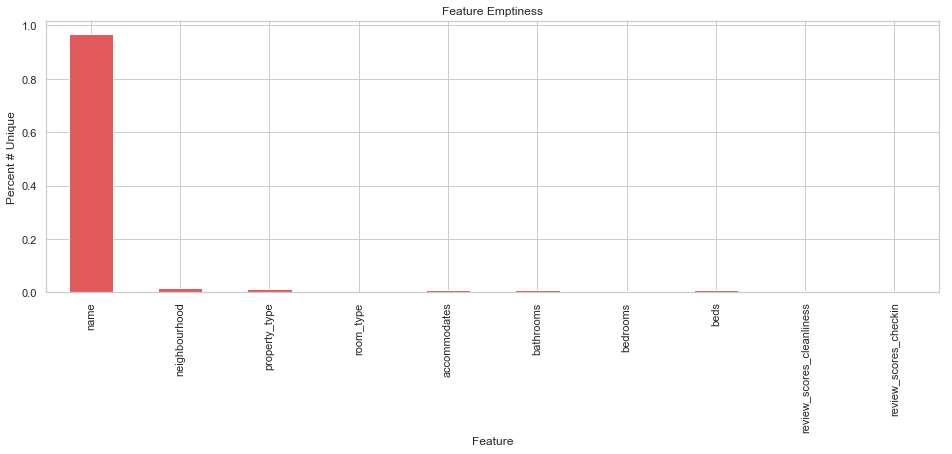

In [309]:
categories = data.columns[data.dtypes == 'object']
percentage_unique = data[categories].nunique() / data.shape[0]

ax = percentage_unique.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent # Unique')
ax.set_title('Feature Emptiness')
plt.show()

The data is in a much better shape but property_type remains an issue. This may need revisited but for now the data exploration will be continued.

As the postcode has null values and unique values, there is other information relating to location so this can be dropped. Also, last_review will be dropped as it should not have much affect when the review was left. Thirdly, host_name will be dropped as each host has a unique id. LAstly, name will be kept as this is expected to be unique and it may be that it can be encoded and be of some use.

In [310]:
data['price'].unique()

array([  27,   65,   38,   59,   35,  450,   50,   32,   25,   17,   16,
         98,   28,  150,   45,   90,   24,   30,   95,   68,   26,   55,
        120,   48,   33,   29,   37,  350,   76,   40,   44,   85,   22,
         70,   31,   75,   54,  140,   20,  100,   18,   23,   73,   80,
        130,  160,  110,   41,  225,   86,   43,   49,   60,   99,   58,
         79,  125,   69,  109,  142,   64,  156,   46,   42,  210,  325,
         67,   83,  260,  215,   63,   34,  135,   89,  105,   57,  167,
        236,   10,   78,   36,   39,   62,   47,  300,   61,   72,  149,
        226,   82,   56,  159,  180,   13,  227,  124,  139,  250,   88,
        195,  138,  242,  338,   71,  118,   77,  190,   19,  279,   21,
        220,  170,  179,   92,  145,   93,  119,  240,  295,   84,  147,
        799,   52,  165,  128,  129,    0,   66,  103,  550,   87,   53,
         74,  126,  115,   15,  101,  280,  175,  158,  500,  112,  200,
        107,  248,   51,  245, 1600,  400,  320,   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001742518E710>,
      dtype=object)

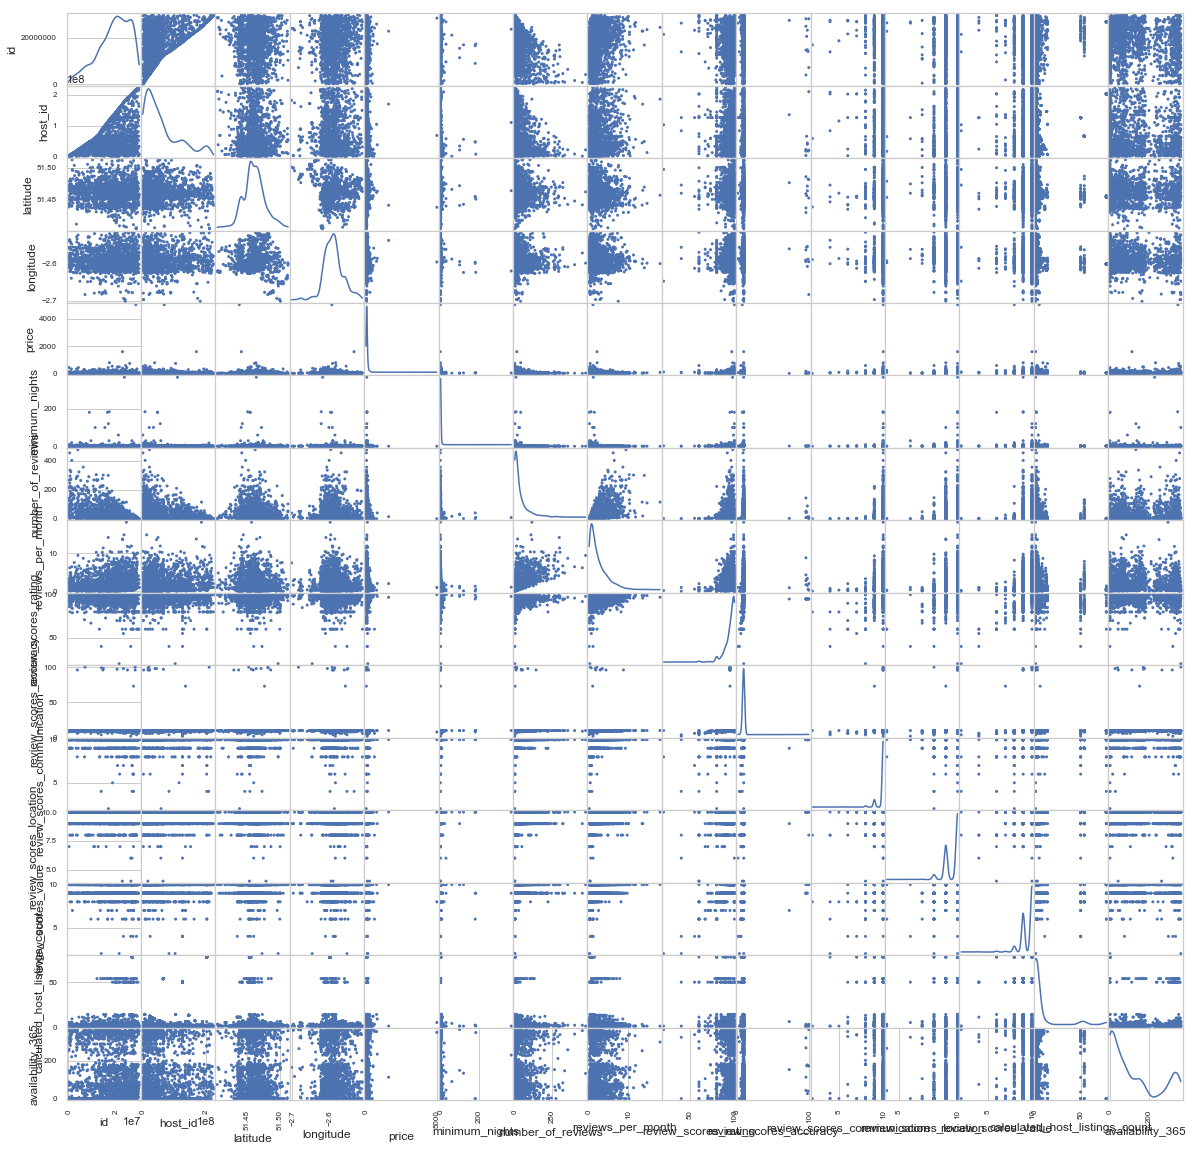

In [311]:
scatter_matrix(data, alpha = 1.0, figsize = (20, 20), diagonal = 'kde')

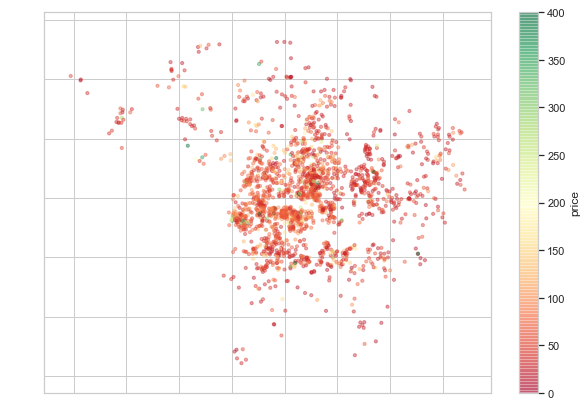

In [312]:
ax=data.plot(kind="scatter", x="longitude", y="latitude", c='price' , cmap=plt.get_cmap("RdYlGn"), vmax=400 ,colorbar=True ,alpha=0.4, figsize=(10,7), s=10 )

plt.ylabel("", fontsize=14)

plt.tick_params(colors='w')

plt.show()

http://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/export?bbox=-2.7214181506,51.38429863569999,-2.4946350022,51.5325545036&bboxSR=4326&imageSR=4326&size=12000,7844&dpi=96&format=png32&transparent=true&f=image


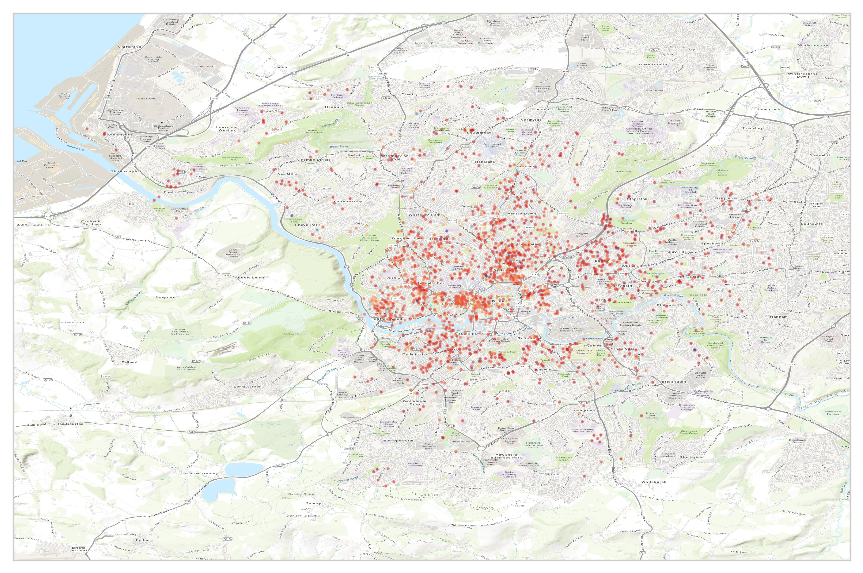

In [313]:
df=data
fig, ax = plt.subplots(figsize=(15,15))

long_max = df['longitude'].max() + .02
long_min = df['longitude'].min() -.02
mid_long = (df['longitude'].min() + df['longitude'].max())/2

lat_max = df['latitude'].max() + .02
lat_min = df['latitude'].min() - .02
mid_lat = (df['latitude'].min() + df['latitude'].max())/2


m = Basemap(ax=ax,lat_0=mid_lat,lon_0=mid_long,\
            llcrnrlat=lat_min,urcrnrlat=lat_max,\
            llcrnrlon=long_min,urcrnrlon=long_max,\
            rsphere=6371200.,resolution='h',area_thresh=10)


m.arcgisimage(service='World_Topo_Map', xpixels = 12000, verbose= True)

ax.scatter(df['longitude'], df['latitude'],
           c=df['price'],alpha=0.5, zorder=10 ,s=4,vmax=400,cmap=plt.get_cmap("RdYlBu"))


#plt.ylabel("", fontsize=14)
#plt.xlabel("", fontsize=14)
plt.tick_params(colors='w')

plt.show()

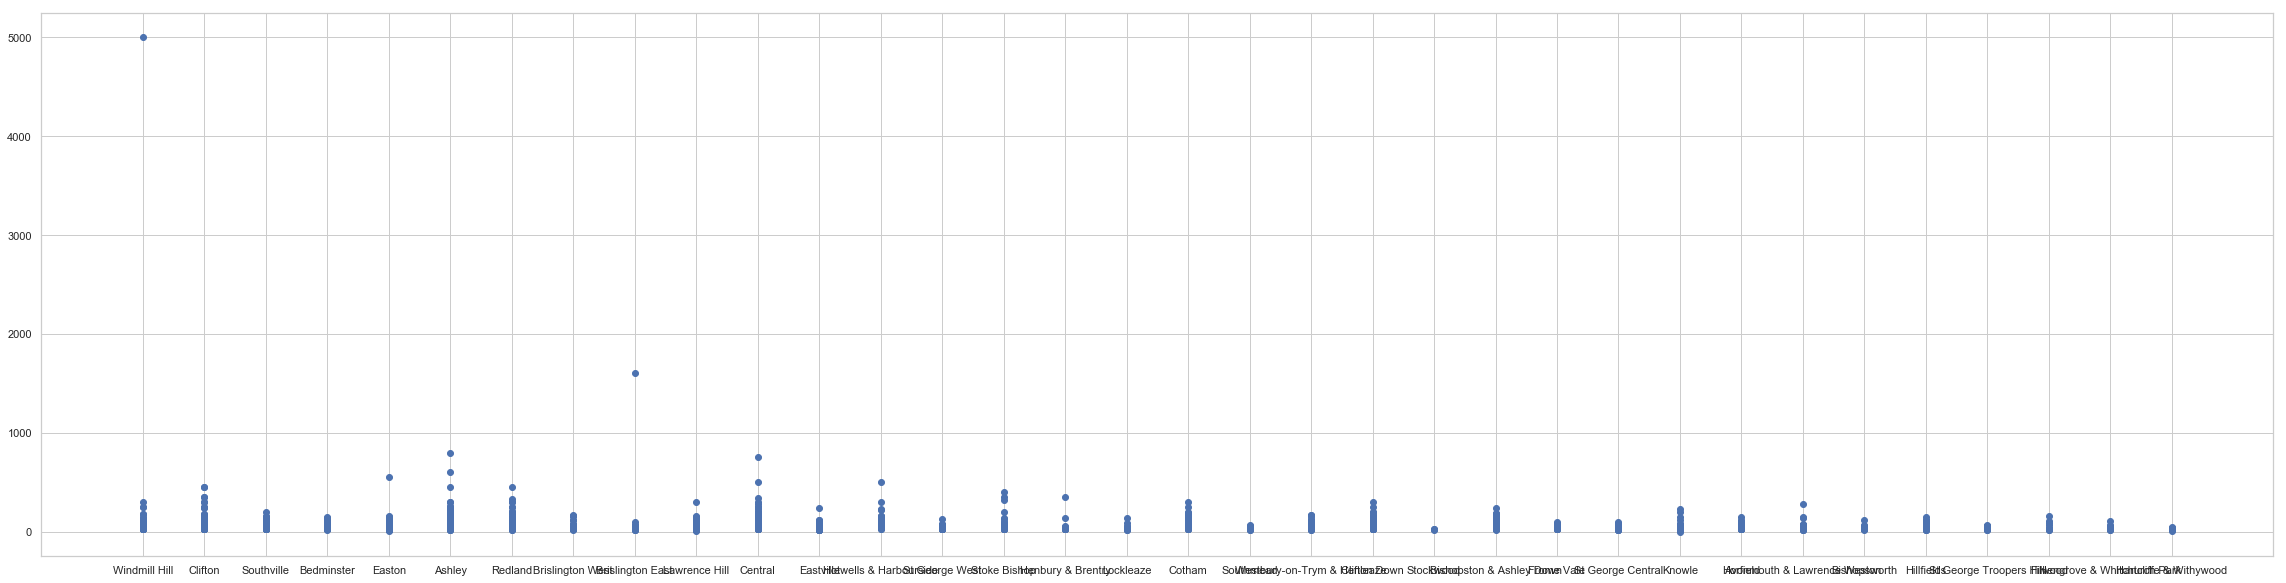

In [314]:
plt.figure(figsize=(40,10))
plt.scatter(data['neighbourhood'], data['price'])

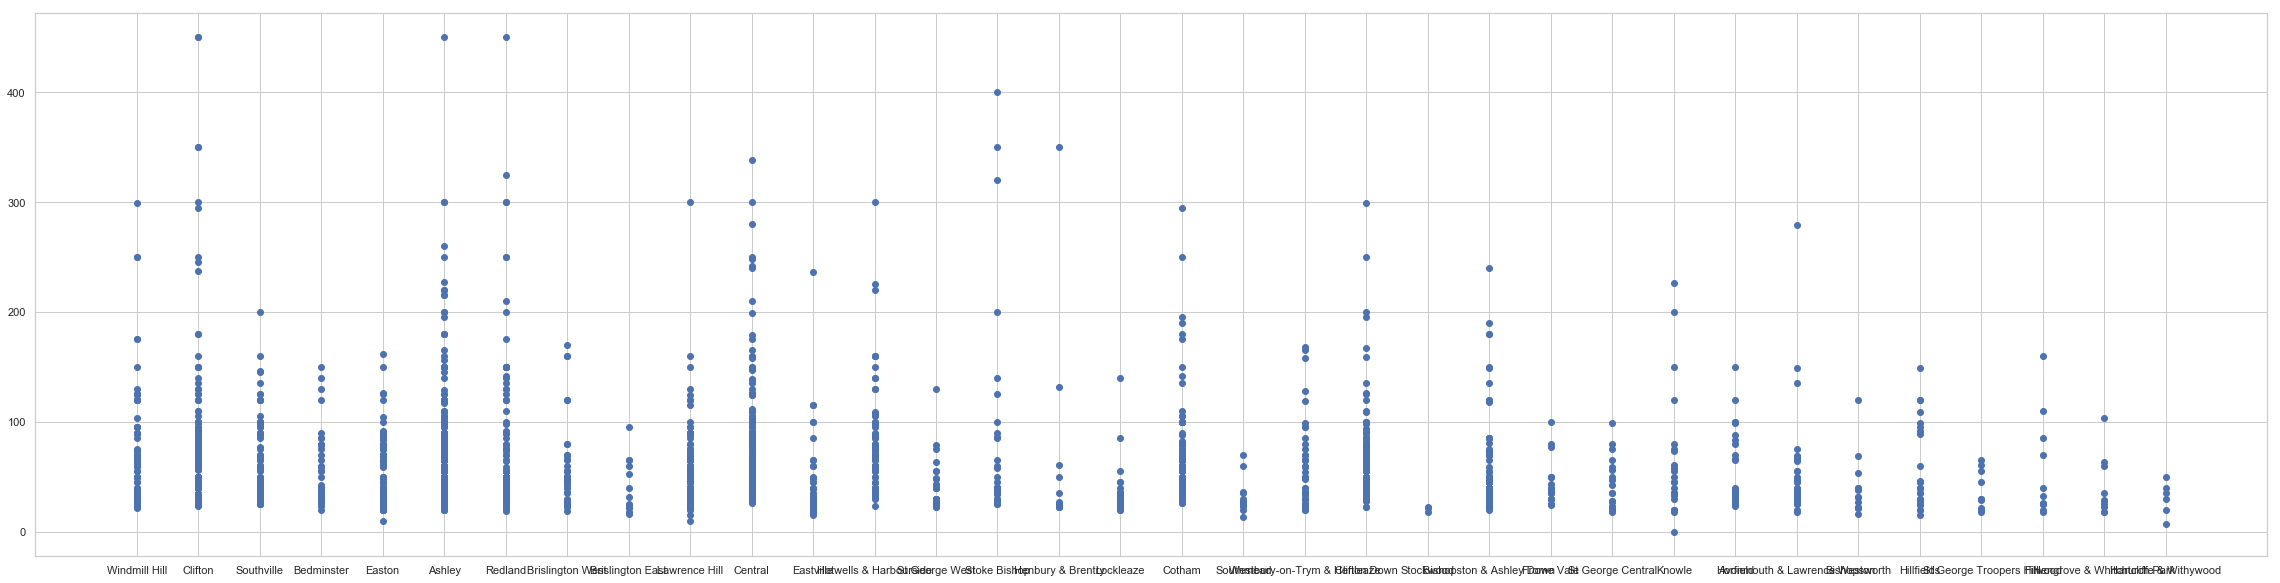

In [315]:
plt.figure(figsize=(40,10))
data = data[np.abs(data.price-data.price.mean())<=(3*data.price.std())]
plt.scatter(data['neighbourhood'],data['price'])

In [316]:
neighbourhoods=data.groupby(['neighbourhood'])
neighbourhoods['price'].mean().sort_values()

neighbourhood
Stockwood                      20.333333
Hartcliffe & Withywood         30.333333
Southmead                      30.875000
Lockleaze                      37.068966
St George Troopers Hill        37.400000
Brislington East               39.357143
Hengrove & Whitchurch Park     40.100000
Bishopsworth                   40.692308
St George West                 40.709677
St George Central              42.350000
Frome Vale                     43.750000
Eastville                      44.978261
Easton                         49.351648
Filwood                        53.000000
Horfield                       54.103448
Avonmouth & Lawrence Weston    54.342857
Bedminster                     54.613636
Lawrence Hill                  56.436364
Hillfields                     58.040000
Bishopston & Ashley Down       59.833333
Brislington West               59.861111
Southville                     60.313131
Windmill Hill                  61.948980
Knowle                         62.280000
We

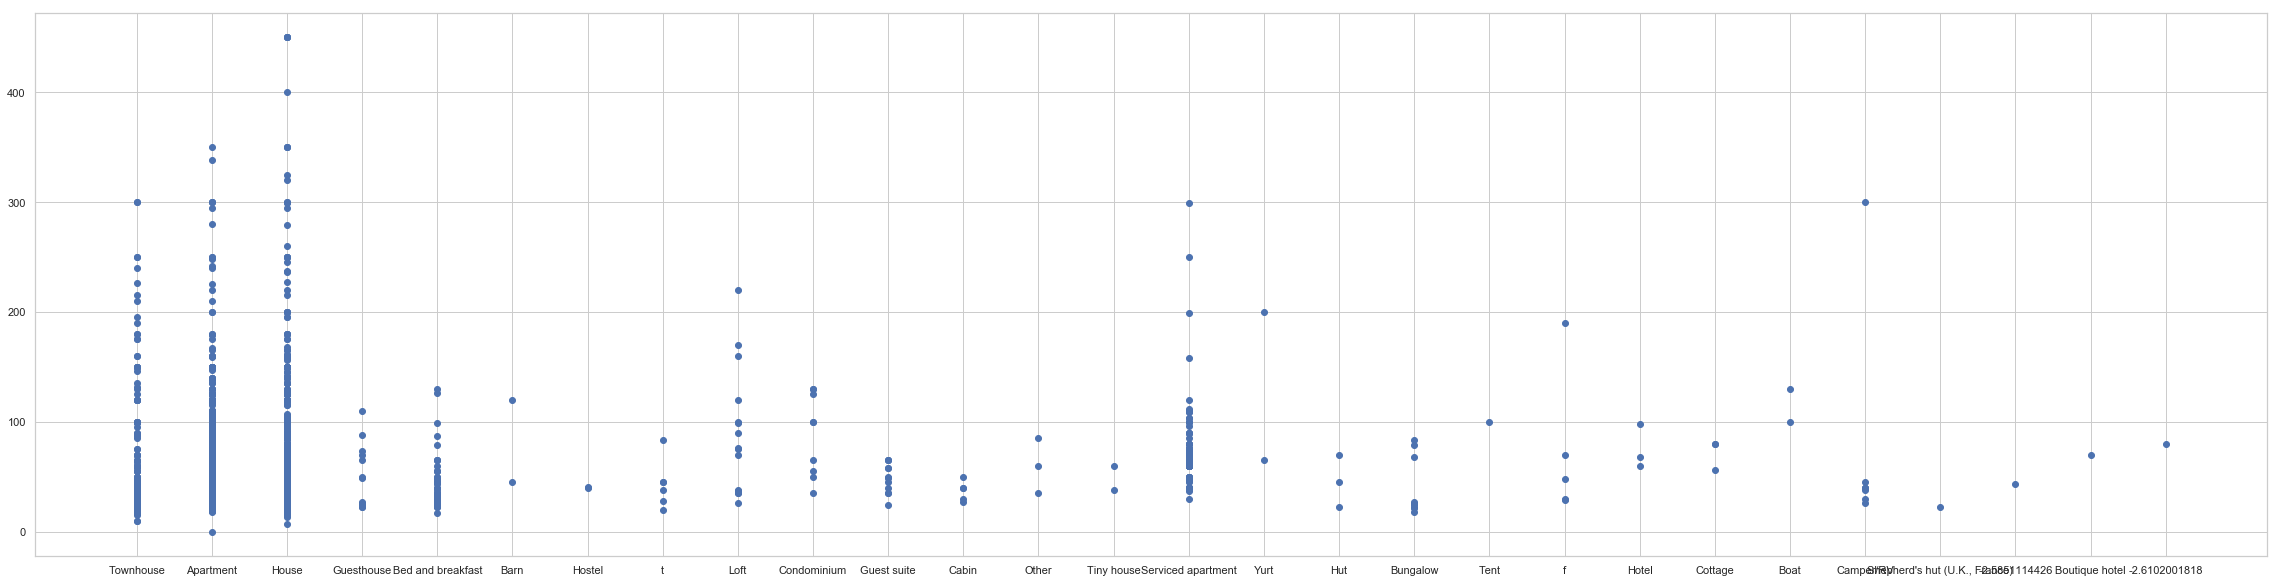

In [317]:
plt.figure(figsize=(40,10))
plt.scatter(data['property_type'], data['price'])

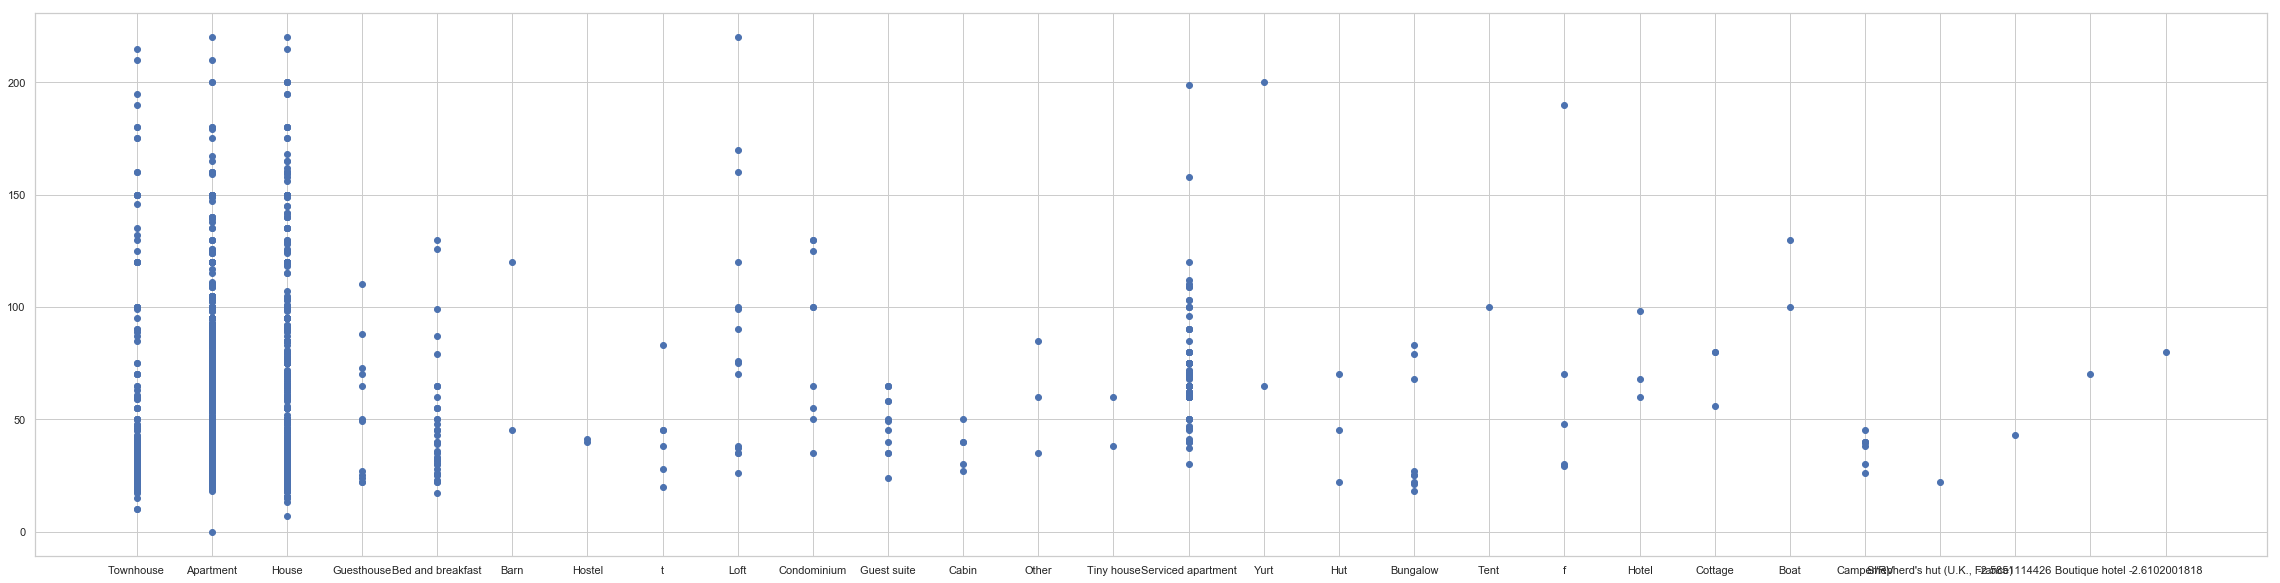

In [318]:
plt.figure(figsize=(40,10))
data = data[np.abs(data.price-data.price.mean())<=(3*data.price.std())]
plt.scatter(data['property_type'],data['price'])

In [319]:
data.property_type.replace({'-2.5851114426': 'Bungalow', '-2.6102001818': 'Loft'}, inplace=True)
properties=data.groupby(['property_type'])
properties['price'].mean().sort_values()

property_type
Shepherd's hut (U.K., France)     22.000000
Camper/RV                         37.375000
Cabin                             37.400000
Hostel                            40.500000
Bungalow                          41.100000
t                                 43.166667
Hut                               45.666667
Bed and breakfast                 47.400000
Tiny house                        49.000000
Guest suite                       49.083333
Guesthouse                        52.083333
Townhouse                         53.184080
House                             56.024279
Other                             60.000000
Apartment                         68.443590
Boutique hotel                    70.000000
Serviced apartment                70.950704
Cottage                           72.000000
f                                 73.400000
Hotel                             75.333333
Barn                              82.500000
Condominium                       87.777778
Loft              

In [320]:
properties['price'].count().sort_values()

property_type
Boutique hotel                     1
Tent                               1
Shepherd's hut (U.K., France)      1
Hostel                             2
Barn                               2
Yurt                               2
Boat                               2
Tiny house                         2
Cottage                            3
Other                              3
Hut                                3
Hotel                              3
Cabin                              5
f                                  5
t                                  6
Camper/RV                          8
Condominium                        9
Bungalow                          10
Guesthouse                        12
Guest suite                       12
Loft                              16
Bed and breakfast                 40
Serviced apartment               142
Townhouse                        201
House                            659
Apartment                        780
Name: price, dtype: int6

In [321]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [322]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [323]:
datanew=MultiColumnLabelEncoder(columns = ['name','neighbourhood', 'property_type', 'room_type',]).fit_transform(data)

In [324]:
datanew.head()

id  name  host_id  neighbourhood   latitude  longitude  property_type  \
0   70820   412   360195             33  51.439942  -2.591726             22   
1  117122   399   591555              8  51.450512  -2.610536              0   
2  146407  1652   708175             26  51.441308  -2.602706             22   
4  220956  1015  1145941              2  51.438517  -2.601421              0   
5  307634  1256  1582810             11  51.466409  -2.555332             22   

   room_type accommodates bathrooms  ... reviews_per_month  \
0          1            2         1  ...              2.10   
1          1            4         2  ...              1.40   
2          1            3         1  ...              0.76   
4          0            2         1  ...              0.85   
5          1            2         1  ...              0.79   

  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                 96.0                    10.0                          9   
1                 99.0                    10.0                         10   
2                 91.0                     9.0                          8   
4                 94.0                    10.0                          9   
5                 93.0                    10.0                         10   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                     10                         10.0                    10.0   
1                     10                         10.0                    10.0   
2                      9                         10.0                     9.0   
4                     10                         10.0                     9.0   
5                     10                         10.0                    10.0   

   review_scores_value calculated_host_listings_count availability_365  
0                 10.0                              5               44  
1                 10.0                              1              360  
2                  9.0                              2               46  
4                  9.0                              1              253  
5                  9.0                              2              146  

[5 rows x 25 columns]

In [325]:
datanew = datanew.convert_objects(convert_numeric=True)
datanew.dtypes

id                                  int64
name                                int32
host_id                             int64
neighbourhood                       int32
latitude                          float64
longitude                         float64
property_type                       int32
room_type                           int32
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                                int64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
review_scores_rating              float64
review_scores_accuracy            float64
review_scores_cleanliness           int64
review_scores_checkin               int64
review_scores_communication       float64
review_scores_location            float64
review_scores_value               float64
calculated_host_listings_count    

In [326]:
datanew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 0 to 2349
Data columns (total 25 columns):
id                                1930 non-null int64
name                              1930 non-null int32
host_id                           1930 non-null int64
neighbourhood                     1930 non-null int32
latitude                          1930 non-null float64
longitude                         1930 non-null float64
property_type                     1930 non-null int32
room_type                         1930 non-null int32
accommodates                      1930 non-null int64
bathrooms                         1930 non-null float64
bedrooms                          1930 non-null float64
beds                              1930 non-null int64
price                             1930 non-null int64
minimum_nights                    1930 non-null int64
number_of_reviews                 1930 non-null int64
reviews_per_month                 1930 non-null float64
review_scores_ratin

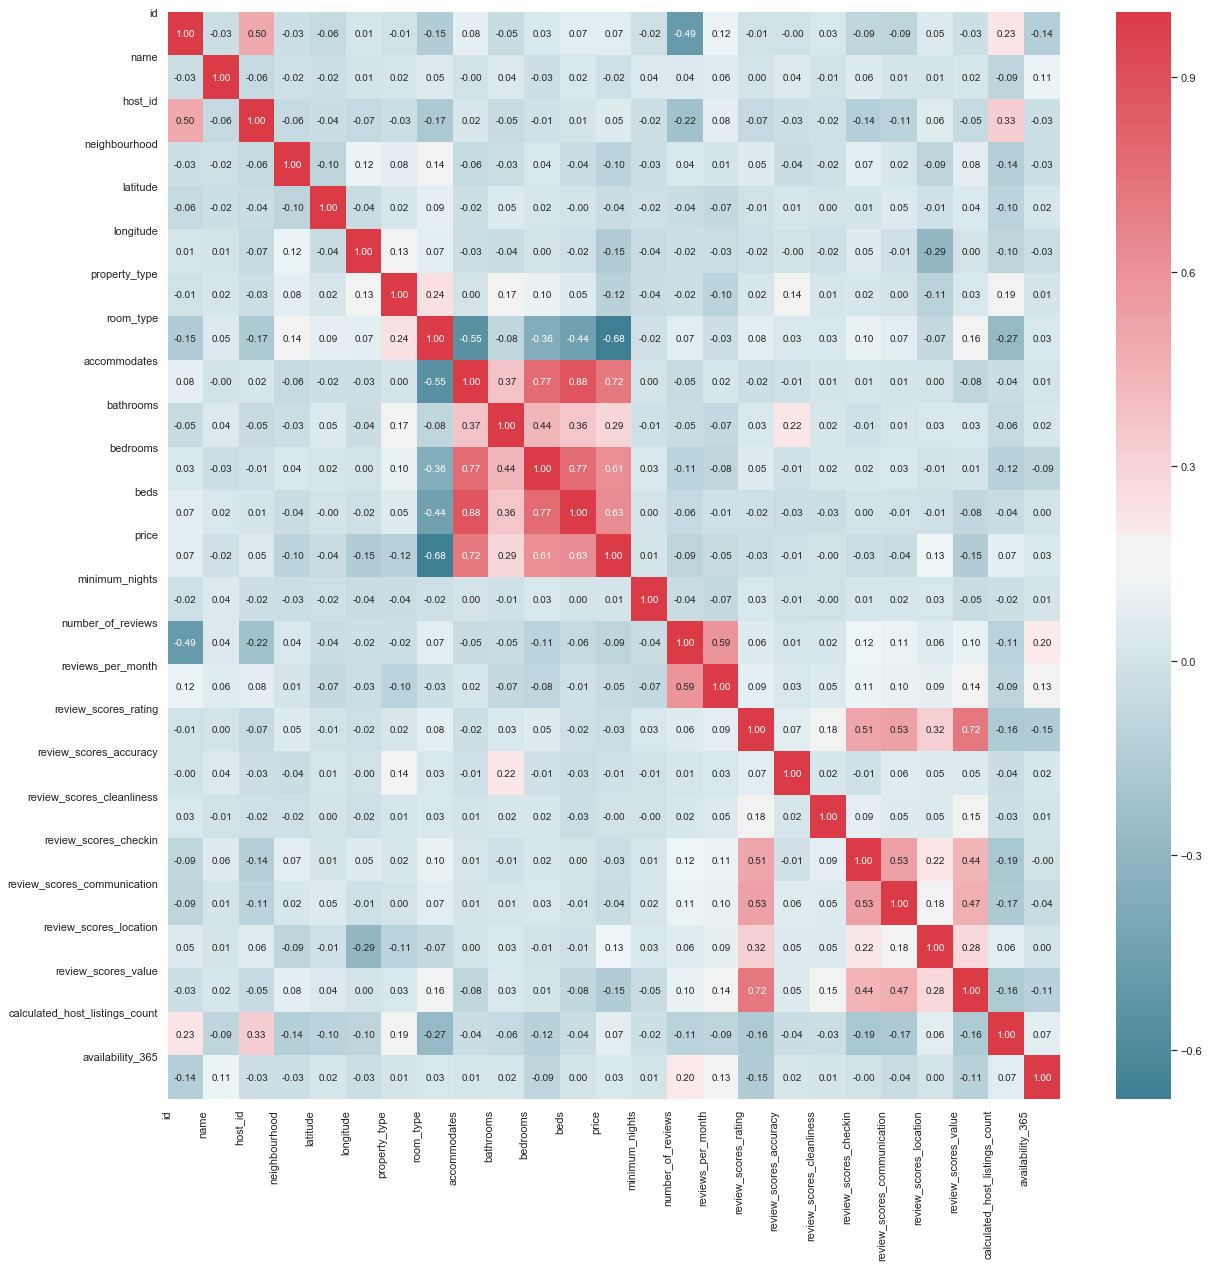

In [327]:
corr = datanew.corr()
fig, ax = plt.subplots(figsize=(20, 20))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

Now the data has been fully cleaned and all categorical variables transformed there is evidently some more features that are slightly correlated. However there is not any strong corrlations which leaves two options; transform some attributes or combine some attributes. The next step is to select the attributes that would most likely impact price according to the analysts judgement.

In [328]:
df=datanew[['neighbourhood']+['latitude']+['longitude']+['property_type']+['room_type']+['accommodates']+['beds']+['price']+['minimum_nights']+['number_of_reviews']+['review_scores_rating']+['availability_365']]
df

neighbourhood   latitude  longitude  property_type  room_type  \
0                33  51.439942  -2.591726             22          1   
1                 8  51.450512  -2.610536              0          1   
2                26  51.441308  -2.602706             22          1   
4                 2  51.438517  -2.601421              0          0   
5                11  51.466409  -2.555332             22          1   
6                 0  51.466684  -2.582741             14          1   
8                24  51.479260  -2.591081             14          1   
10                6  51.444294  -2.557774             14          1   
11                0  51.464865  -2.579892             14          1   
12                0  51.464992  -2.578263             14          1   
13                5  51.441115  -2.536829             22          1   
14                5  51.442931  -2.537776             14          1   
15                0  51.469198  -2.581899              0          0   
16                0  51.464648  -2.583665              0          1   
17               24  51.473313  -2.605979             14          0   
18               22  51.456182  -2.577378              0          1   
19                7  51.450360  -2.589379              0          0   
20               12  51.471340  -2.534868             11          0   
21               33  51.441917  -2.570735              0          1   
22                0  51.469744  -2.575651             22          1   
23               26  51.445534  -2.604126             14          1   
24                8  51.454434  -2.620657              0          0   
25               20  51.452075  -2.607238             22          1   
26               33  51.440620  -2.572297              0          0   
27               29  51.459691  -2.541038              2          1   
28               26  51.442011  -2.619388              0          1   
29               24  51.470795  -2.596447             14          1   
33               26  51.441605  -2.598635             14          1   
34               24  51.475131  -2.604740              1          0   
35               12  51.482562  -2.554599             14          1   
...             ...        ...        ...            ...        ...   
2272             12  51.478286  -2.537911              0          1   
2274             13  51.430213  -2.604339              0          1   
2276             12  51.475539  -2.559758             14          1   
2279             26  51.446344  -2.608526             16          1   
2280             26  51.442014  -2.609889             14          1   
2281              9  51.463642  -2.613308              0          0   
2283             33  51.441123  -2.581589              0          0   
2284             24  51.471333  -2.602205              0          0   
2286              8  51.451734  -2.622644              0          1   
2296             22  51.467331  -2.572002             14          1   
2299              0  51.466679  -2.585273             22          1   
2300             23  51.500057  -2.568866             14          1   
2301              1  51.503454  -2.653648             14          1   
2303             23  51.497403  -2.558321              0          1   
2304             18  51.476020  -2.521766             14          1   
2307             33  51.442719  -2.579750             11          1   
2308             22  51.456151  -2.578512             14          1   
2309              8  51.452465  -2.623463              0          1   
2310              8  51.452641  -2.621780              0          1   
2311             22  51.454042  -2.579006              0          1   
2317             22  51.455831  -2.581728              0          1   
2319             20  51.446409  -2.602152              0          1   
2321              8  51.453064  -2.623497              0          0   
2324             23  51.499636  -2.568547             14          1   
2325             26  51.441260

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017429CEE080>,
      dtype=object)

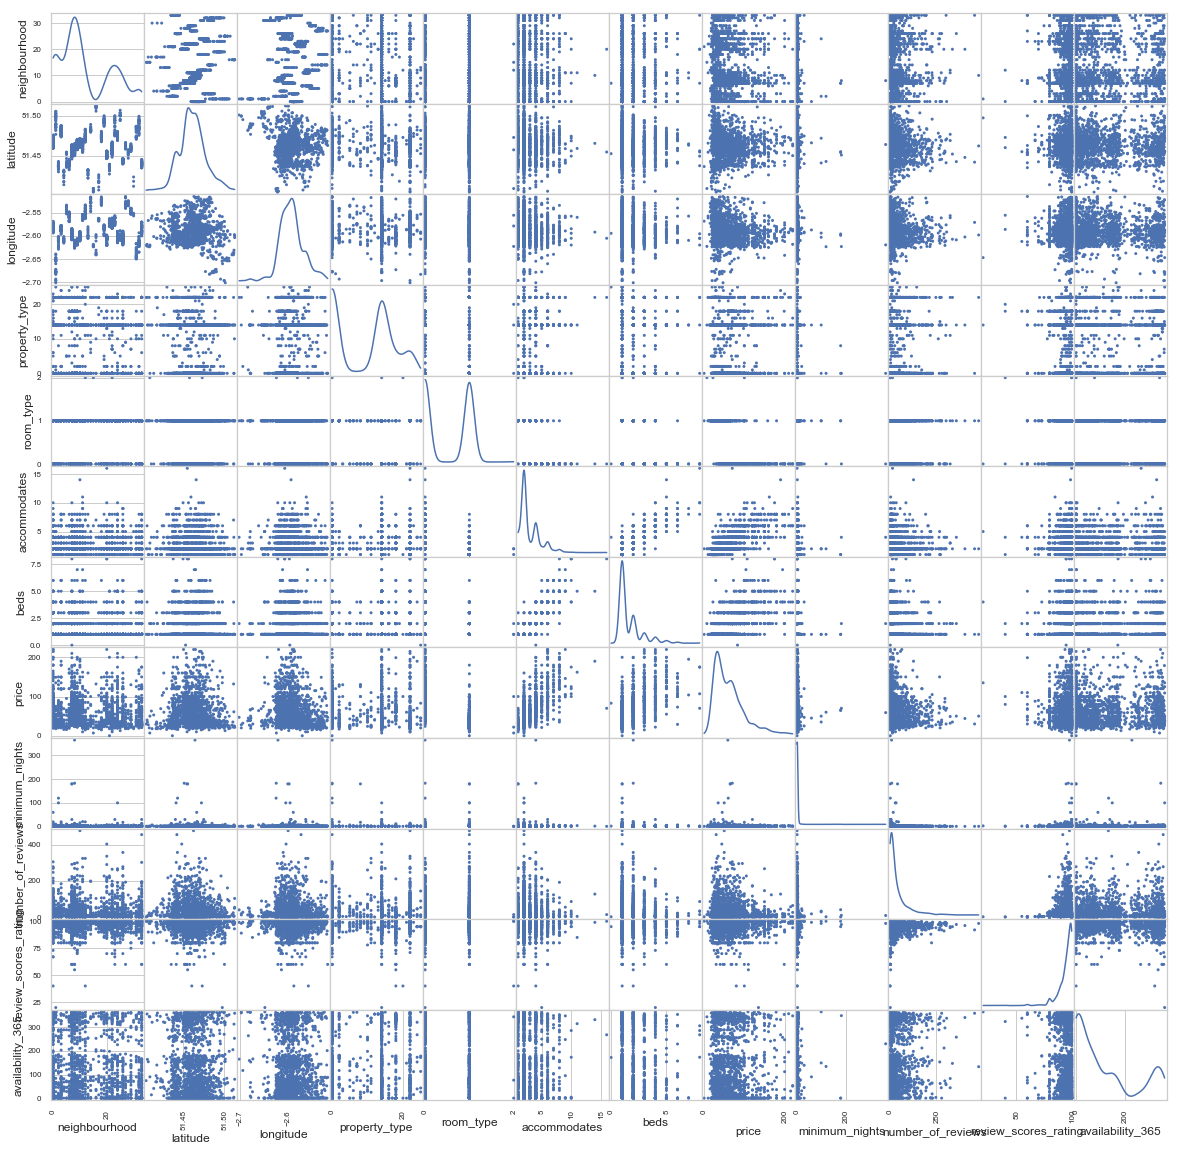

In [329]:
scatter_matrix(df, alpha = 1.0, figsize = (20, 20), diagonal = 'kde')

As there are a lot of distributions which are skewed these will be transformed using the log function.

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 0 to 2349
Data columns (total 12 columns):
neighbourhood           1930 non-null int32
latitude                1930 non-null float64
longitude               1930 non-null float64
property_type           1930 non-null int32
room_type               1930 non-null int32
accommodates            1930 non-null int64
beds                    1930 non-null int64
price                   1930 non-null int64
minimum_nights          1930 non-null int64
number_of_reviews       1930 non-null int64
review_scores_rating    1930 non-null float64
availability_365        1930 non-null int64
dtypes: float64(3), int32(3), int64(6)
memory usage: 173.4 KB


In [332]:
df.head()

neighbourhood   latitude  longitude  property_type  room_type  \
0             33  51.439942  -2.591726             22          1   
1              8  51.450512  -2.610536              0          1   
2             26  51.441308  -2.602706             22          1   
4              2  51.438517  -2.601421              0          0   
5             11  51.466409  -2.555332             22          1   

   accommodates  beds  price  minimum_nights  number_of_reviews  \
0             2     1     27               4                130   
1             4     2     65               1                126   
2             3     2     38               2                 57   
4             2     1     59               1                 74   
5             2     1     35               2                 14   

   review_scores_rating  availability_365  
0                  96.0                44  
1                  99.0               360  
2                  91.0                46  
4                  94.0               253  
5                  93.0               146

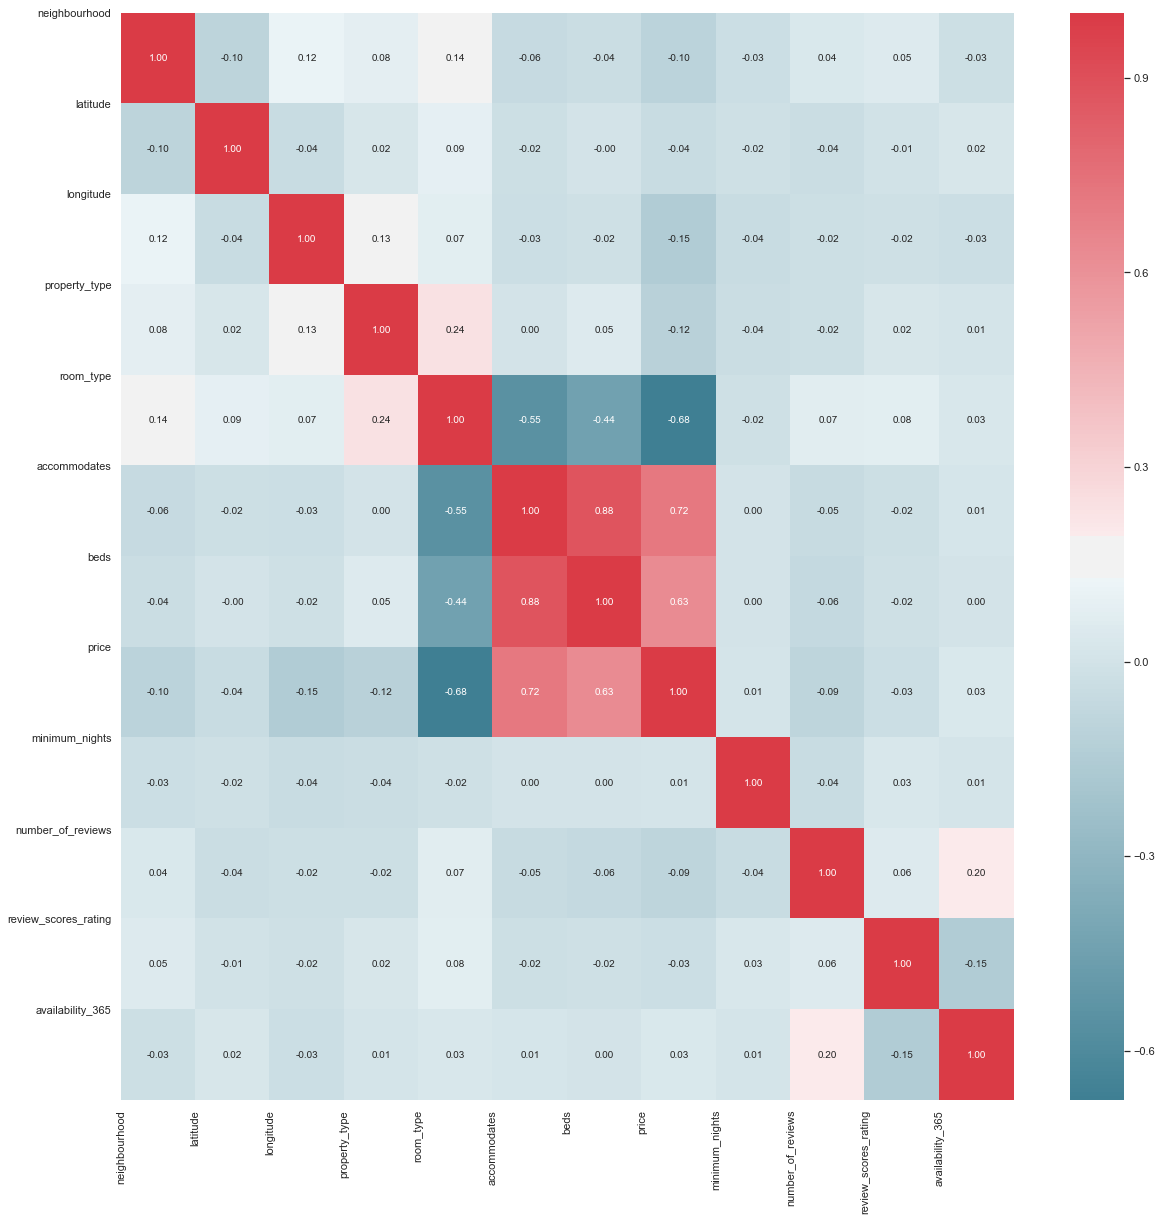

In [333]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20, 20))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

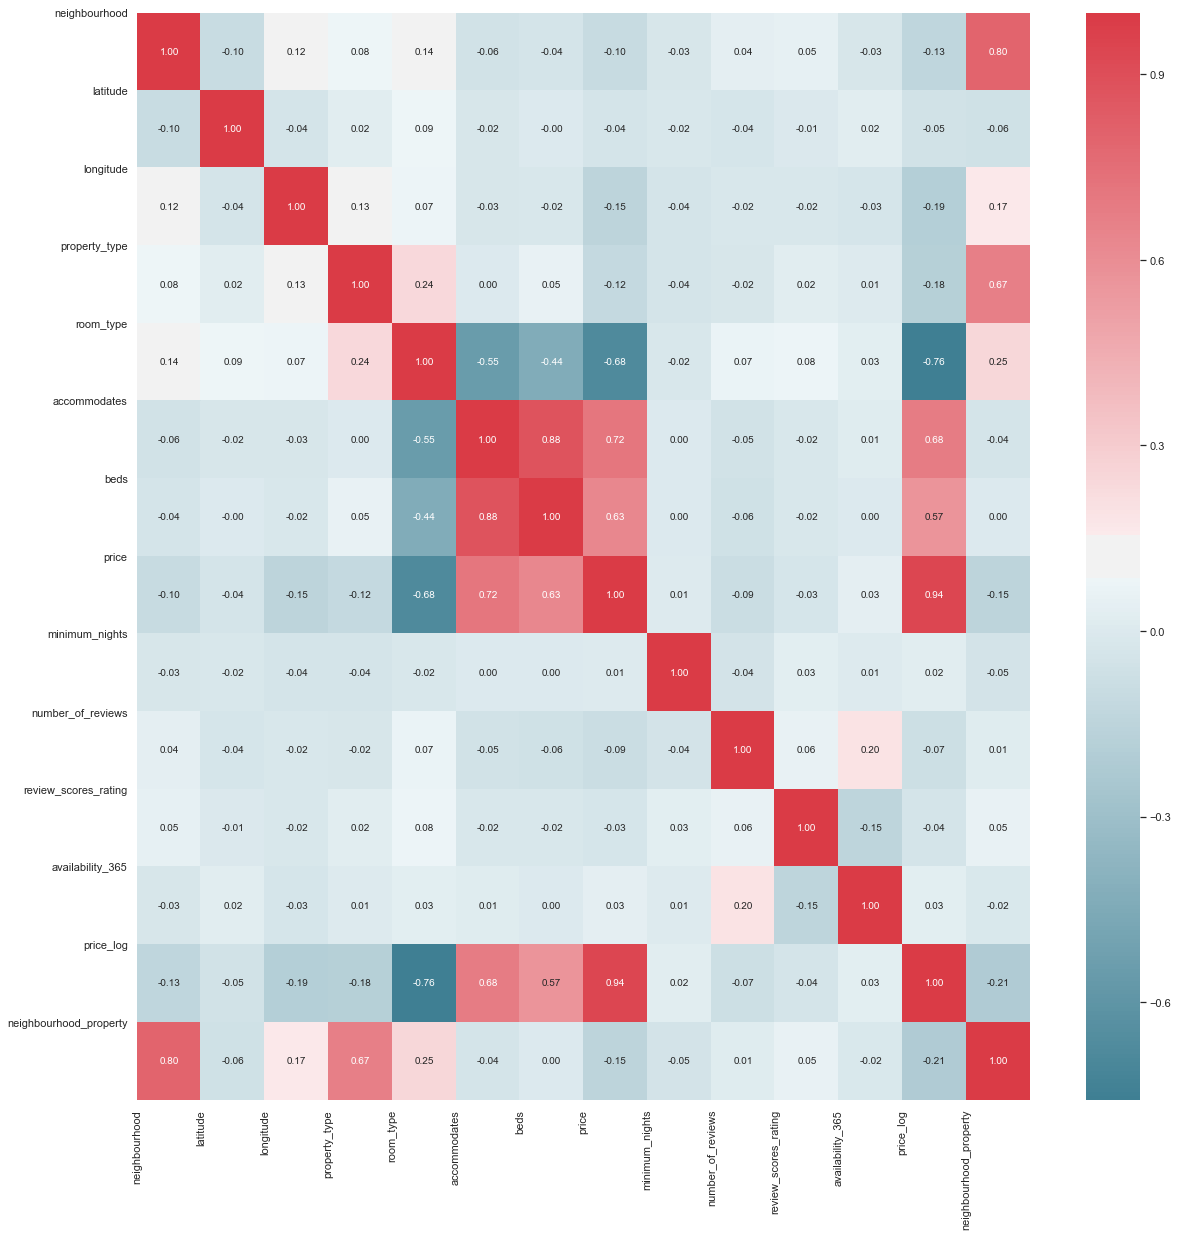

In [334]:
df['price_log']=np.log(df['price']+1)
df['neighbourhood_property']=df['neighbourhood']+df['property_type']

As there is a slightly better corellation when transfrom the price variable and combining nieghbourhood and property, thses will be selected for modelling.

In [512]:
df1=df[['neighbourhood_property']+['room_type']+['accommodates']+['beds']+['price_log']]
cols= ['neighbourhood_property','room_type','accommodates','beds','price_log']
for col in cols:
    df1[col] = df1[col].astype(dtype=np.float64)
df1.dtypes

neighbourhood_property    float64
room_type                 float64
accommodates              float64
beds                      float64
price_log                 float64
dtype: object

(array([  1.,   0.,   0.,   1.,   3., 116., 645., 592., 449., 123.]),
 array([0.        , 0.53981627, 1.07963254, 1.61944881, 2.15926508,
        2.69908135, 3.23889762, 3.77871389, 4.31853016, 4.85834643,
        5.3981627 ]),
 <a list of 10 Patch objects>)

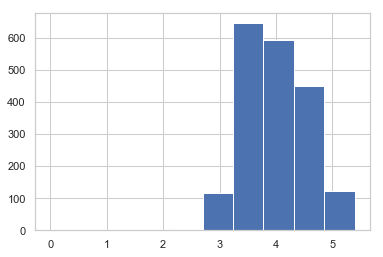

In [513]:
plt.hist(df1['price_log'])

(array([175., 366., 187., 137., 452., 124., 207., 118., 140.,  24.]),
 array([ 0. ,  5.5, 11. , 16.5, 22. , 27.5, 33. , 38.5, 44. , 49.5, 55. ]),
 <a list of 10 Patch objects>)

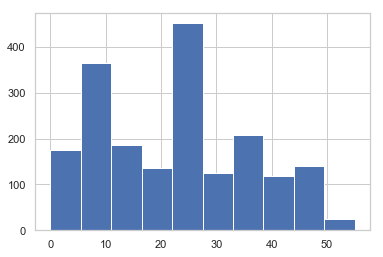

In [514]:
plt.hist(df1['neighbourhood_property'])

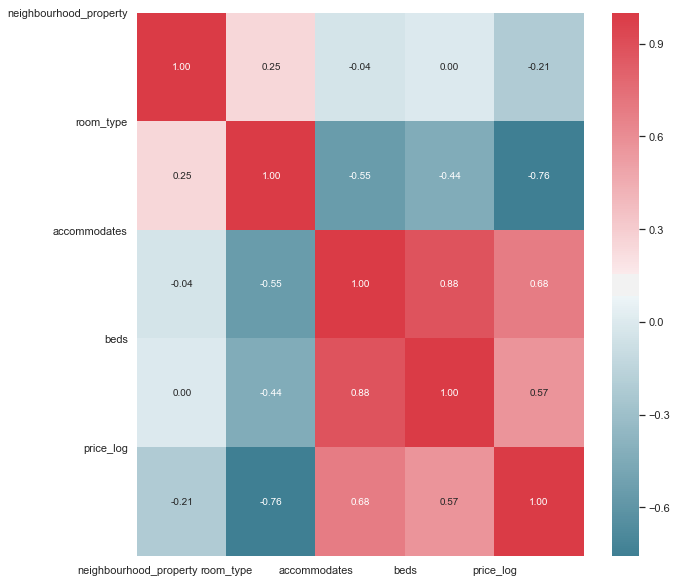

In [515]:
corr = df1.corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [523]:
X=df1.iloc[:, 0:4]
y= df1.iloc[:, 4]
#X=X.values.reshape(-1,1)
#y=y.values.reshape(-1,1)
y= pd.DataFrame(y)
#X.shape
df1.isnull().count()

neighbourhood_property    1930
room_type                 1930
accommodates              1930
beds                      1930
price_log                 1930
dtype: int64

In [524]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x = std_scaler.fit_transform(X)

In [525]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40) 
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)


Coefficients: 
 [[-0.03469926 -0.29170336  0.21493909  0.00310203]]
Mean squared error: 0.10
Variance score: 0.69
Mean Absolute Error: 0.24


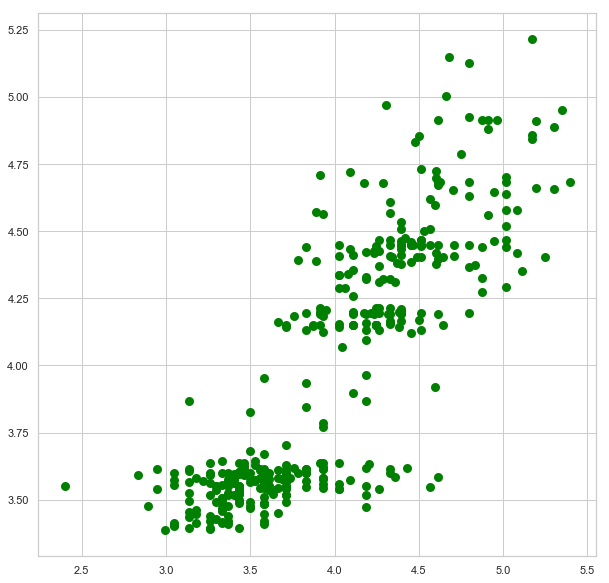

In [526]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# The coefficients
print('Coefficients: \n', linreg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test, y_pred))


# Plot outputs
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(y_test, y_pred, color='green', linewidth =3)
plt.show()

In [527]:
from sklearn.svm import LinearSVR
regr = LinearSVR(random_state=0, tol=1e-5)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [-0.03276638 -0.29790562  0.23468605 -0.01228051]
Mean squared error: 0.10
Variance score: 0.69
Mean Absolute Error: 0.24


In [529]:
from sklearn.tree import DecisionTreeRegressor
tree_reg= DecisionTreeRegressor(max_depth=2)
tree_reg.fit(x_train, y_train)
y_pred = tree_reg.predict(x_test)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test, y_pred))

Mean squared error: 0.11
Variance score: 0.66
Mean Absolute Error: 0.25


In [531]:
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test, y_pred))


Mean squared error: 0.10
Variance score: 0.69
Mean Absolute Error: 0.24
